# fitting

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
curvefit = scipy.optimize.curve_fit

In [2]:
def fitting(x,sigma):
    norm = scipy.stats.norm.pdf
    return norm(x,0,sigma)

In [143]:
N = 80
R_m = []
R_s = []
R_std = []
S_s = []
for i in range(1,N+1):
    
    A = np.load(f'dt=0.01/N={N},k={i}.npz')
    rs = A['rs']
    Qs = A['Qs']
    r_std = np.std(rs)
    r_m = np.mean(rs)
    R_m.append(r_m)
    R_s.append(rs)
    R_std.append(r_std)
    Q,C = np.unique(Qs, return_counts=True)
    P = C/ np.sum(C)
    popt, pcov  = curvefit(fitting,Q,P)
    S_s.append(*popt)

# glob.glob('N=80,*')

In [135]:
N = 60
R_m = []
R_s = []
R_std = []
S_s2 = []
ks2 = np.arange(1,N+1)
for i in ks2:
    
    A = np.load(f'dt=0.01/N={N},k={i}.npz')
    rs = A['rs']
    Qs = A['Qs']
    r_std = np.std(rs)
    r_m = np.mean(rs)
    R_m.append(r_m)
    R_s.append(rs)
    R_std.append(r_std)
    Q,C = np.unique(Qs, return_counts=True)
    P = C/ np.sum(C)
    popt, pcov  = curvefit(fitting,Q,P)
    S_s2.append(*popt)

# glob.glob('N=80,*')

In [138]:
N = 80
ks = np.arange(1,N+1)

(2.0, 9.341485505499117)

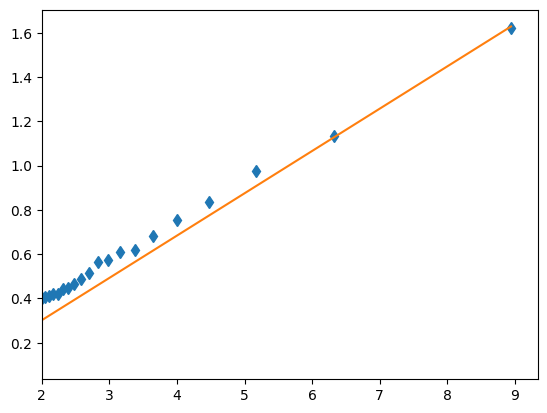

In [146]:
plt.plot(np.sqrt(80/ks),S_s,'d')
plt.plot(np.sqrt(80/ks),0.191*np.sqrt(80/ks)-0.08)
plt.xlim(2,)
# plt.plot(np.sqrt(60/ks2),S_s2)

In [141]:
N = 60
R2_m = []
R2_s = []
R2_std = []

for i in range(1,N+1):
    
    A = np.load(f'dt=0.01/N={N},k={i}.npz')
    rs = A['rs']
    r_std = np.std(rs)
    r_m = np.mean(rs)
    R2_m.append(r_m)
    R2_s.append(rs)
    R2_std.append(r_std)
    
# glob.glob('N=80,*')

In [132]:
len(R_m)

79

(0.0, 0.4)

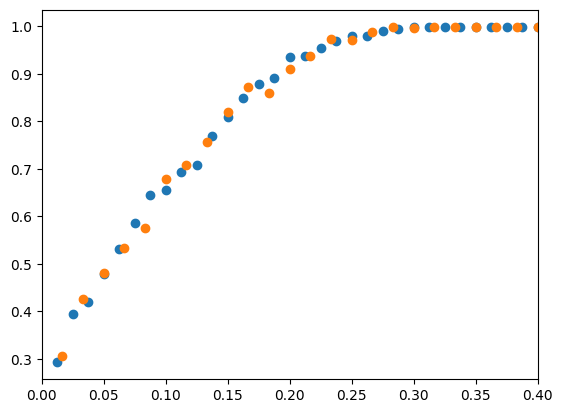

In [144]:
plt.scatter(np.arange(1,80+1)/80,R_m)
plt.scatter(np.arange(1,60+1)/60,R2_m)
plt.xlim(0,0.4)
plt.a

In [112]:
def fitting(x,sigma):
    norm = scipy.stats.norm.pdf
    return norm(x,0,sigma)

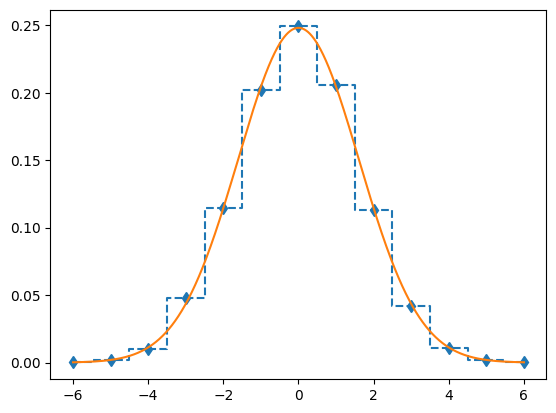

In [49]:
N = 80
for i in range(1,2):
# A = np.load(f'dt=0.01/N={N},k={i}.npz')
    # A = np.load(f'N={N},k={i}.npz')
    A = np.load(f'dt=0.01/N={N},k={i}.npz')
    rs = A['rs'][:]
    Qs = A['Qs'][:]
    x = np.linspace(-6,6,10000)

    Q,C = np.unique(Qs, return_counts=True)
    P = C/ np.sum(C)
    popt, pcov  = curvefit(fitting,Q,P)
    plt.plot(Q,P,'d--',drawstyle='steps-mid')
    plt.plot(x,fitting(x,popt))

In [50]:
popt

array([1.60810672])

In [170]:
Q,C = np.unique(Qs, return_counts=True)
P = C/ np.sum(C)
# plt.bar(*np.unique(Qs, return_counts=True))

In [171]:
popt, pcov  = curvefit(fitting,Q,P)
popt

array([1.6104161])

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_89318/2423031854.py:2: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "d-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(Q,P,'d-',drawstyle='steps-mid',ls='--')


array([1.6104161])

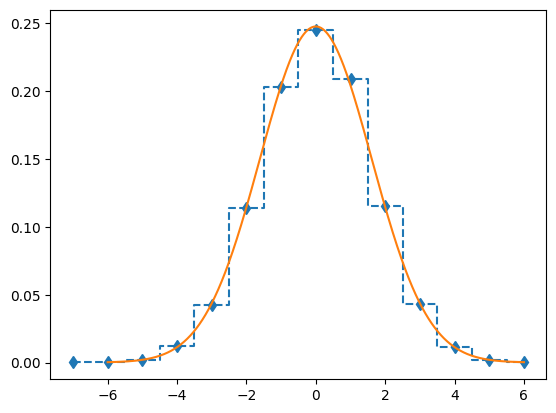

In [173]:
# plt.plot(Q,P,'d')
plt.plot(Q,P,'d-',drawstyle='steps-mid',ls='--')
# plt.hist(Qs,bins=100,density=True)
plt.plot(x,fitting(x,popt))
popt

In [14]:
N = 80
k = 2
Aij = np.zeros((N,N))
for i in range(N):
    j = np.arange((i-k),(i+k+1),1)%N
    Aij[i,j]= 1
    Aij[i,i] = 0

In [15]:
Jij =   + Aij - np.eye(N)*2

In [16]:
ev,eV = np.linalg.eig(Jij)

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
from tqdm.notebook import tqdm

In [52]:
# @jit(nopython = True)
def RKHG(f,y0,t,D,args=()):
    n = len(t)
    size = len(y0)
    y = np.zeros((n, size))
    y[0] = y0
    h = t[1] - t[0]
    sh = np.sqrt(h)
    for i in range(n - 1):
        S = np.random.choice([-1,1],size=size)
        dW = np.random.normal(0,1,size)*sh
        k1 = h*f(y[i],t[i],*args) + (dW - S*sh)*D
        k2 = h*f(y[i]+k1,t[i]+h,*args) + (dW + S*sh)*D
        y[i+1] = y[i] + 0.5*(k1+k2)
    return y


@jit(nopython = True)
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y

In [53]:
from scipy.special import erfinv
import scipy.stats as scs
from scipy.stats import mode

In [54]:
@jit(nopython = True)
def Kuramoto(Theta,t,omega,N,Aij):
    # print("Case m = 0")
    Theta = Theta.copy()
    theta = Theta[:N]
    theta_i= theta.reshape(1,-1)
    theta_j = theta_i.T
    # theta_i,theta_j = np.meshgrid(theta,theta,sparse=True)
    dtheta = omega +  np.sum(Aij*np.sin(theta_j - theta_i),axis=0)
    Theta[:N] = dtheta
    return Theta

In [300]:
N = 80
omega = 0
seed = 11
# np.random.seed(seed)
theta_random = np.random.uniform(-np.pi, np.pi, size=N)
# omega = np.sort(omega)-np.mean(omega)
# omega = np.ones(N)

In [301]:
omega = 0

In [472]:
%timeit RK4(Kuramoto,theta_random,t, args=(omega,N,Aij))

1.33 s ± 32.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
while Q not in [6,7,-7]:
    omega = 1
    t_end = 1000
    dt = 0.1
    theta_random = np.random.uniform(-np.pi, np.pi, size=N)
    t = np.arange(0, t_end+dt/2, dt)
    sol = RK4(Kuramoto,theta_random,t, args=(omega,N,Aij))
    theta_s = sol[:,:N]
    dtheta_s = sol[:,N:2*N] 
    Q = mode(np.round(np.diff((theta_s[-1]-np.pi)%(np.pi*2)+np.pi) / (np.pi*2/N),1))[0]
    rphi = (np.mean(np.exp(1j*theta_s.T),axis=0))
    r = np.abs(rphi)
    Q, np.mean(rs[-500:])
    psi = np.angle(rphi)
    rtheta_s = (theta_s.T-psi).T

    print(Q)
np.save(f'Q_state/Q={int(Q)}',r)

In [500]:
omega = 1
t_end = 1000
dt = 0.001
    # theta_random = np.random.uniform(-np.pi, np.pi, size=N)
t = np.arange(0, t_end+dt/2, dt)

In [501]:
sol = RK4(Kuramoto,theta_random,t, args=(omega,N,Aij))
theta_s = sol[:,:N]
dtheta_s = sol[:,N:2*N] 
Q = mode(np.round(np.diff((theta_s[-1]-np.pi)%(np.pi*2)+np.pi) / (np.pi*2/N),1))[0]
rphi = (np.mean(np.exp(1j*theta_s.T),axis=0))
r = np.abs(rphi)
Q, np.mean(rs[-500:])
psi = np.angle(rphi)
rtheta_s = (theta_s.T-psi).T

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_4471/2989250074.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  Q = mode(np.round(np.diff((theta_s[-1]-np.pi)%(np.pi*2)+np.pi) / (np.pi*2/N),1))[0]


In [502]:
mode(np.round(np.diff((theta_s[-1]-np.pi)%(np.pi*2)+np.pi) / (np.pi*2/N),1))

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_4471/2284121356.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode(np.round(np.diff((theta_s[-1]-np.pi)%(np.pi*2)+np.pi) / (np.pi*2/N),1))


ModeResult(mode=array([6.]), count=array([73]))

In [442]:
theta_s.shape

(10001, 80)

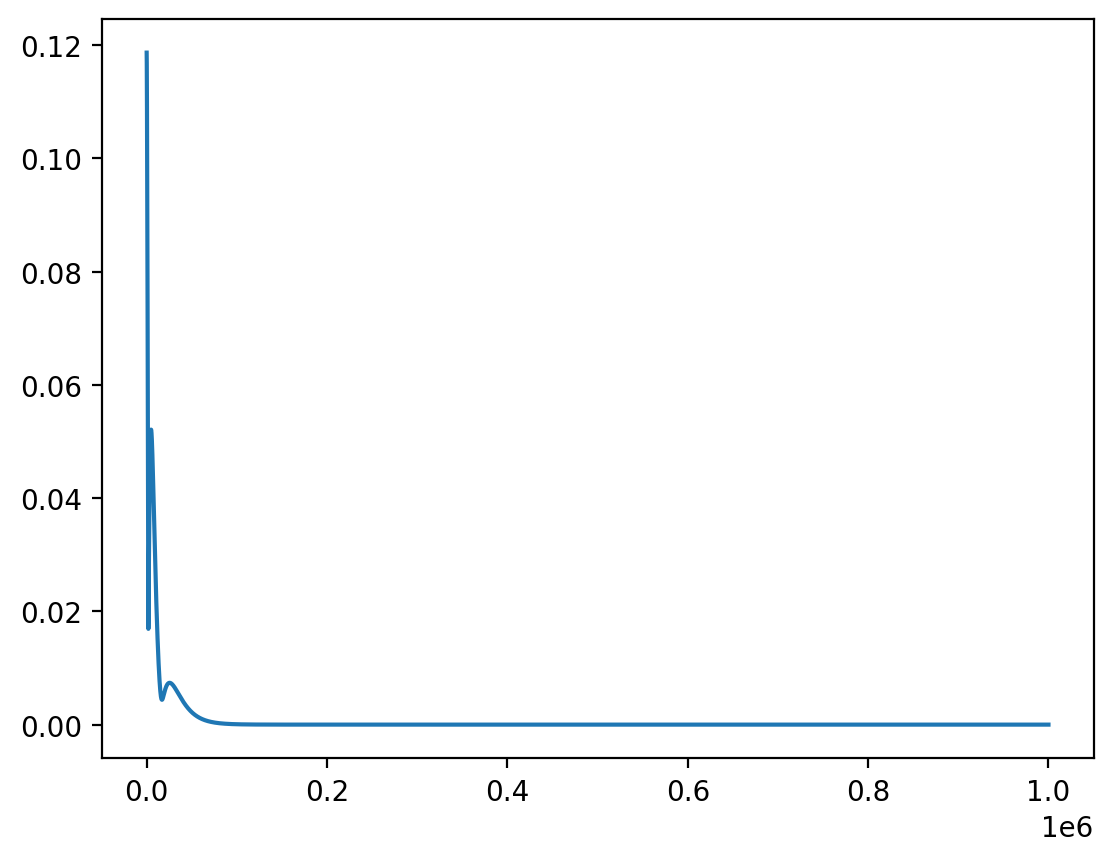

In [503]:
plt.plot(r)

(-1.2, 1.2, -1.2, 1.2)

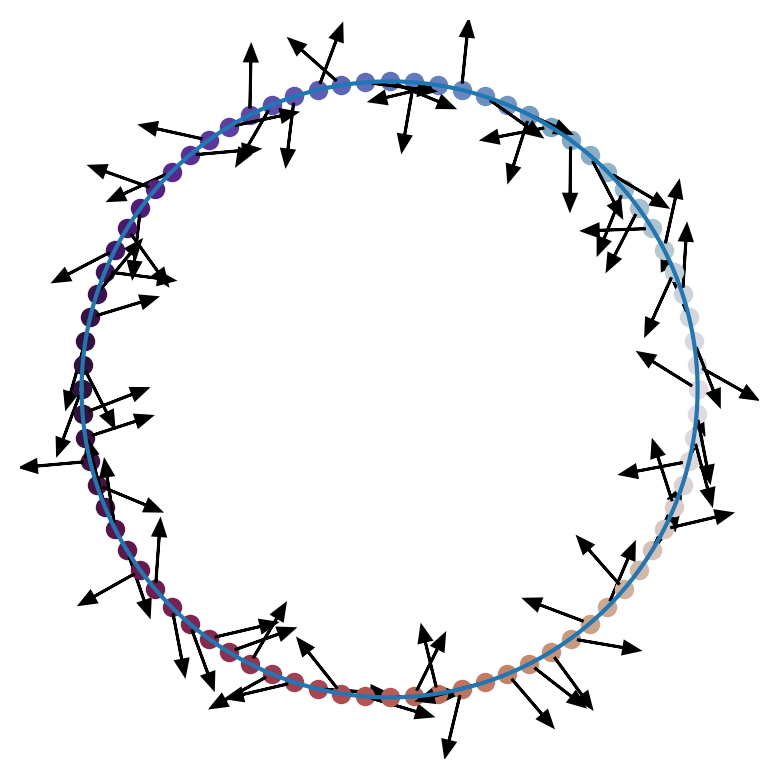

In [493]:
c_ = np.linspace(-np.pi,np.pi,10000)
fig, ax =  plt.subplots(1)
plt.plot(np.cos(c_),np.sin(c_))
plt.gca().set_aspect('equal')


theta_0 = rtheta_s[-1][0]
colors= plt.cm.twilight(np.linspace(0,1,N))
# for j,cm in range(0,100,10),colors:
j = 0
for i,(theta,color) in enumerate(zip(rtheta_s[j],colors)):
    o_deg = 2*np.pi*i/N
    o_x ,o_y =np.cos(o_deg),np.sin(o_deg)
    plt.scatter(o_x ,o_y,color=color)
    deg = theta
    x,y = np.cos(deg-theta_0),np.sin(deg-theta_0)
    length = 0.2
    head = 0.05

    ax.arrow(o_x,o_y,x*(length),y*(length),head_starts_at_zero=True,length_includes_head=True,head_width=0.04, head_length=head ,fc='k', ec='k')
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')


In [495]:
colors= plt.cm.twilight(np.linspace(0,1,N))

In [496]:
fig.set_facecolor('white')
def ANI(idx):
    ax.clear()
    theta_0 = rtheta_s[-1][0]
    # for j,cm in range(0,100,10),colors:
    for i,(theta,color) in enumerate(zip(rtheta_s[idx],colors)):
        o_deg = 2*np.pi*i/N
        o_x ,o_y =np.cos(o_deg),np.sin(o_deg)
        ax.scatter(o_x ,o_y,color=color)
        deg = theta
        x,y = np.cos(deg-theta_0),np.sin(deg-theta_0)
        length = 0.2
        head = 0.05
        ax.arrow(o_x,o_y,x*(length),y*(length),head_starts_at_zero=True,length_includes_head=True,head_width=0.04, head_length=head ,fc='k', ec='k')
    ax.set_xlim(-1.2,1.2)
    ax.set_ylim(-1.2,1.2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')


In [480]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [494]:
len(r)

100001

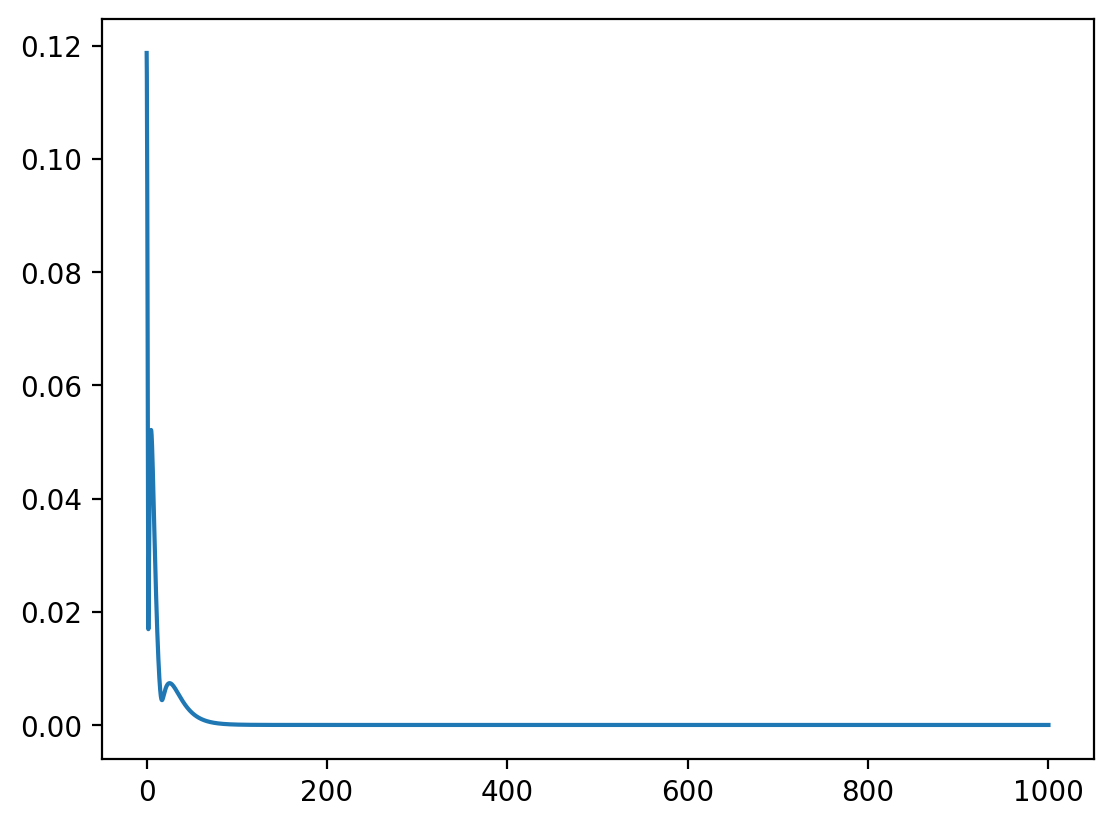

In [481]:
plt.plot(t,r)

In [504]:
%config InlineBackend.figure_format = 'retina'
idxs=  np.arange(0,800000,4000)
ani = FuncAnimation(fig,ANI,frames=idxs,interval=50)

In [505]:
int(Q)

6

In [506]:
ani.save(f'Q_state/N = {N}, Q = {int(Q)}.mp4',dpi=400)

In [507]:
HTML(ani.to_html5_video())


In [454]:
B = A.split('\n')[1:]

In [460]:
Cs = []
for text in B:
    try:
        C = float(text[1:-1]) 
        Cs.append(int(C))
    except ValueError:
        pass


In [464]:
from scipy.stats import norm

In [471]:
norm.pdf(6,0,1.61) *10000

2.389277749416993

In [475]:
len(Cs)*1.33 / 60

175.22750000000002